In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Reviews.csv')

In [2]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.shape

(568454, 10)

In [4]:
# Dropping the duplicates and checking the shape of dataset
data.drop_duplicates(subset=['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Score','Summary','Text']).shape

(568173, 10)

In [5]:
# Checking for Null and NAN's in dataset
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
def fill_missing_data(data):
    data.ProfileName.fillna(value = "Others", inplace = True)
    data.Summary.fillna(value = "Not known", inplace = True)
    return data

In [7]:
new_data = fill_missing_data(data)
print(np.shape(new_data))
new_data.head(2)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [8]:
new_data.isnull().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                   False
Text                      False
dtype: bool

In [9]:
df = new_data[new_data.Score !=3]

In [10]:
df.shape

(525814, 10)

In [11]:
# Assigning review 0 for datapoints with Score 1,2
# Assigning review 1 for datapoints with Score 4,5
df['review'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# imports
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

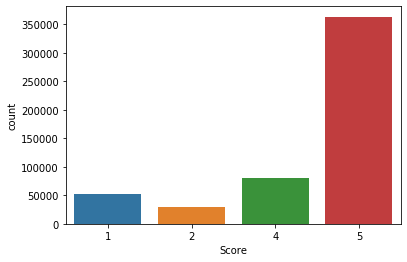

In [13]:
sns.countplot(x='Score',data=df)
plt.show()

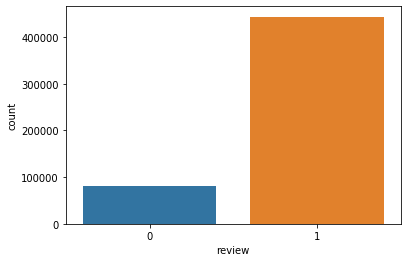

In [14]:
sns.countplot(x='review',data=df)
plt.show()

In [15]:
# Taking the Summary and Review to X and Y respectively
X = df['Summary']
Y = df['review']

In [16]:
print(X.shape)
print(Y.shape)

(525814,)
(525814,)


In [17]:
X.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

print(X_train.shape)
print('*'*100)
print(X_test.shape)
print('*'*100)
print(y_train.shape)
print('*'*100)
print(y_test.shape)
print('*'*100)

(394360,)
****************************************************************************************************
(131454,)
****************************************************************************************************
(394360,)
****************************************************************************************************
(131454,)
****************************************************************************************************


In [19]:
# imports
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
import string

In [20]:
stemmer = PorterStemmer()
# defining a stem function to stem the token
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
# defining a tokenize function to tokenize the text remove punctuation and call stem_tokens
# this tokenize function shall be integrated in CountVectorizer
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [21]:
# import
from sklearn.feature_extraction.text import CountVectorizer

# instantiate CountVectorizer
# this will also do all the prepocessing of stemming, removing punctuation and stop words
# tokenize function is integrated to do all preprocessing steps
vect = CountVectorizer(tokenizer=tokenize, stop_words='english')

In [22]:
# fit
# learn the 'vocabulary' of the training data
vect.fit(X_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'so

CountVectorizer(stop_words='english',
                tokenizer=<function tokenize at 0x000002B14CCC01F8>)

In [23]:
# transform train data
X_train_bog = vect.transform(X_train)

In [24]:
X_train_bog

<394360x28336 sparse matrix of type '<class 'numpy.int64'>'
	with 1114134 stored elements in Compressed Sparse Row format>

In [25]:
# transform test data to bog
X_test_bog = vect.transform(X_test)
X_test_bog

<131454x28336 sparse matrix of type '<class 'numpy.int64'>'
	with 365256 stored elements in Compressed Sparse Row format>

## MultinomialNB

In [27]:
# import
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm

# instantiate a Multinomial Naive bayes model
nb = MultinomialNB()
alpha=[ 0.001, 0.01, 0.1, 1, 10,200,400,600,800,1000 ]

for i in tqdm(alpha):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_train_bog,y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.29it/s]


In [31]:
nb.score(X_test_bog,y_test,sample_weight=None)

0.8574025894989883

## LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train_bog,y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [33]:
clf.score(X_test_bog,y_test,sample_weight=None)

0.9121669937772909

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_bog,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
neigh.score(X_test_bog,y_test,sample_weight=None)

0.9037762259041185

## Observation

In [37]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Test-Accuracy"]

x.add_row(["BOW", "MultinomialNB",0.857 ])
x.add_row(["BOW", "LogisticRegression",0.912 ])
x.add_row(["BOW", "KNeighborsClassifier",0.903 ])


print(x)

+------------+----------------------+---------------+
| Vectorizer |        Model         | Test-Accuracy |
+------------+----------------------+---------------+
|    BOW     |    MultinomialNB     |     0.857     |
|    BOW     |  LogisticRegression  |     0.912     |
|    BOW     | KNeighborsClassifier |     0.903     |
+------------+----------------------+---------------+
